### Module 10: Clustering

We can cluster in one dimension as well as in many dimensions. In this problem, we are going to cluster numbers on the real line. The particular numbers (data points) are 1, 4, 9, 16, 25, 36, 49, 64, 81, and 100, i.e., the squares of 1 through 10. We shall use a k-means algorithm, with two clusters. You can verify easily that no matter which two points we choose as the initial centroids, some prefix of the sequence of squares will go into the cluster of the smaller and the remaining suffix goes into the other cluster. As a result, there are only nine different clusterings that can be achieved, ranging from {1}{4,9,...,100} through {1,4,...,81}{100}.

We then go through a reclustering phase, where the centroids of the two clusters are recalculated and all points are reassigned to the nearer of the two new centroids. For each of the nine possible clusterings, calculate how many points are reclassified during the reclustering phase.

In [98]:
numbers = [i ** 2 for i in range(1, 11)]
clusterings = [(numbers[:n], numbers[n:]) for n in range(1, len(numbers))]

initial_centroid_sets = [(36, 81),
                         ( 1, 16),
                         ( 4, 64),
                         (36, 64)]

def find_clustering(clusterings, centroid_mean):
    for clusters in clusterings:
        cluster1, cluster2 = clusters
        if cluster1[-1] <= centroid_mean and cluster2[0] >= centroid_mean:
            return clusters
        
def calc_centroid(cluster):
    return sum(cluster) / len(cluster)

for initial_centroids in initial_centroid_sets:
    mean = np.mean(initial_centroids)
    clusters = find_clustering(clusterings, mean)
    new_centroids = tuple(calc_centroid(cluster) for cluster in clusters)
    new_mean = np.mean(new_centroids)
    new_clusters = find_clustering(clusterings, new_mean)
    print('Clustering {} with initial centroids {} changed to {}'.format(
        clusters,
        initial_centroids,
        new_clusters,
    ))
    print()

Clustering ([1, 4, 9, 16, 25, 36, 49], [64, 81, 100]) with initial centroids (36, 81) changed to ([1, 4, 9, 16, 25, 36, 49], [64, 81, 100])

Clustering ([1, 4], [9, 16, 25, 36, 49, 64, 81, 100]) with initial centroids (1, 16) changed to ([1, 4, 9, 16], [25, 36, 49, 64, 81, 100])

Clustering ([1, 4, 9, 16, 25], [36, 49, 64, 81, 100]) with initial centroids (4, 64) changed to ([1, 4, 9, 16, 25, 36], [49, 64, 81, 100])

Clustering ([1, 4, 9, 16, 25, 36, 49], [64, 81, 100]) with initial centroids (36, 64) changed to ([1, 4, 9, 16, 25, 36, 49], [64, 81, 100])



Suppose we want to assign points to one of two cluster centroids, either (0,0) or (100,40). Depending on whether we use the L1 or L2 norm, a point (x,y) could be clustered with a different one of these two centroids. For this problem, you should work out the conditions under which a point will be clustered with the centroid (0,0) when the L1 norm is used, but clustered with the centroid (100,40) when the L2 norm is used.

In [99]:
import numpy as np

points = np.array([[51, 15],
                   [55,  5],
                   [66,  5],
                   [56, 13]])

centroids = np.array([[  0,  0],
                      [100, 40]])

def l1_norm(centroid, point):
    return sum([
        abs(centroid[dim] - point[dim])
        for dim in range(0, len(centroid))
    ])

def l2_norm(centroid, point):
    return np.sqrt(sum([
        (centroid[dim] - point[dim]) ** 2
        for dim in range(0, len(centroid))
    ]))

def closest_centroid(centroids, point, norm_func):
    closest = None
    min_dist = None
    for centroid in centroids:
        dist = norm_func(centroid, point)
        if closest is None or dist < min_dist:
            closest = centroid
            min_dist = dist
    return closest

for point in points:
    l1_centroid = closest_centroid(centroids, point, l1_norm)
    l2_centroid = closest_centroid(centroids, point, l2_norm)
    print('Point: {}, L1 centroid: {}, L2 centroid: {}'.format(
        point,
        l1_centroid,
        l2_centroid,
    ))

Point: [51 15], L1 centroid: [0 0], L2 centroid: [0 0]
Point: [55  5], L1 centroid: [0 0], L2 centroid: [0 0]
Point: [66  5], L1 centroid: [100  40], L2 centroid: [100  40]
Point: [56 13], L1 centroid: [0 0], L2 centroid: [100  40]


Suppose our data set consists of the perfect squares 1, 4, 9, 16, 25, 36, 49, and 64, which are points in one dimension. Perform a hierarchical clustering on these points, as follows. Initially, each point is in a cluster by itself. At each step, merge the two clusters with the closest centroids, and continue until only two clusters remain.

In [96]:
points = [i ** 2 for i in range(1, 9)]
clusters = [[p] for p in points]

def calc_centroid(cluster):
    return sum(cluster) / len(cluster)

def centroid_distance(centroid1, centroid2):
    return abs(centroid1 - centroid2)

def closest_centroids(centroids):
    closest = (None, None)
    min_dist = None
    for i in range(0, len(centroids)):
        for j in range(i + 1, len(centroids)):
            centroid1 = centroids[i]
            centroid2 = centroids[j]
            dist = centroid_distance(centroid1, centroid2)
            if min_dist is None or dist < min_dist:
                closest = (centroid1, centroid2)
                min_dist = dist
    return closest

def merge_clusters(clusters, clusters_to_merge):
    return [
        c for c in clusters
        if c[0] not in clusters_to_merge
    ] + [clusters_to_merge]


TARGET_NUM_CLUSTERS = 2

centroids = [calc_centroid(cluster) for cluster in clusters]
print('Clusters: {}'.format(clusters))
print('Centroids: {}'.format(centroids))
print()

while len(clusters) > TARGET_NUM_CLUSTERS:
    centroid1, centroid2 = closest_centroids(centroids)
    cluster1 = clusters[centroids.index(centroid1)]
    cluster2 = clusters[centroids.index(centroid2)]
    clusters_to_merge = cluster1 + cluster2
    clusters = merge_clusters(clusters, clusters_to_merge)
    centroids = [calc_centroid(cluster) for cluster in clusters]
    print('Clusters: {}'.format(clusters))
    print('Centroids: {}'.format(centroids))
    print()


Clusters: [[1], [4], [9], [16], [25], [36], [49], [64]]
Centroids: [1.0, 4.0, 9.0, 16.0, 25.0, 36.0, 49.0, 64.0]

Clusters: [[9], [16], [25], [36], [49], [64], [1, 4]]
Centroids: [9.0, 16.0, 25.0, 36.0, 49.0, 64.0, 2.5]

Clusters: [[16], [25], [36], [49], [64], [9, 1, 4]]
Centroids: [16.0, 25.0, 36.0, 49.0, 64.0, 4.666666666666667]

Clusters: [[36], [49], [64], [9, 1, 4], [16, 25]]
Centroids: [36.0, 49.0, 64.0, 4.666666666666667, 20.5]

Clusters: [[64], [9, 1, 4], [16, 25], [36, 49]]
Centroids: [64.0, 4.666666666666667, 20.5, 42.5]

Clusters: [[64], [36, 49], [9, 1, 4, 16, 25]]
Centroids: [64.0, 42.5, 11.0]

Clusters: [[9, 1, 4, 16, 25], [64, 36, 49]]
Centroids: [11.0, 49.666666666666664]



Suppose we want to assign points to one of two cluster centroids, either (0,0) or (100,40). Depending on whether we use the L1 or L2 norm, a point (x,y) could be clustered with a different one of these two centroids. For this problem, you should work out the conditions under which a point will be clustered with the centoid (0,0) when the L1 norm is used, but clustered with the centroid (100,40) when the L2 norm is used.

In [100]:
points = np.array([[53, 10],
                   [54, 8],
                   [51,  18],
                   [51, 15]])

centroids = np.array([[  0,  0],
                      [100, 40]])

for point in points:
    l1_centroid = closest_centroid(centroids, point, l1_norm)
    l2_centroid = closest_centroid(centroids, point, l2_norm)
    print('Point: {}, L1 centroid: {}, L2 centroid: {}'.format(
        point,
        l1_centroid,
        l2_centroid,
    ))

Point: [53 10], L1 centroid: [0 0], L2 centroid: [0 0]
Point: [54  8], L1 centroid: [0 0], L2 centroid: [0 0]
Point: [51 18], L1 centroid: [0 0], L2 centroid: [100  40]
Point: [51 15], L1 centroid: [0 0], L2 centroid: [0 0]


Suppose that the true data consists of three clusters, as suggested by the diagram below:

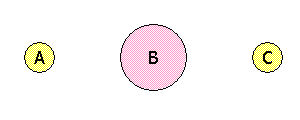

In [5]:
from IPython.display import Image
Image(filename='clusters.gif')

There is a large cluster B centered around the origin (0,0), with 8000 points uniformly distributed in a circle of radius 2. There are two small clusters, A and C, each with 1000 points uniformly distributed in a circle of radius 1. The center of A is at (-10,0) and the center of C is at (10,0).

Suppose we choose three initial centroids x, y, and z, and cluster the points according to which of x, y, or z they are closest. The result will be three apparent clusters, which may or may not coincide with the true clusters A, B, and C. Say that one of the true clusters is correct if there is an apparent cluster that consists of all and only the points in that true cluster. Assuming initial centroids x, y, and z are chosen independently and at random, what is the probability that A is correct? What is the probability that C is correct? What is the probability that both are correct?

In [66]:
A_size = 1000
B_size = 8000
C_size = 1000

num_points = sum([A_size, B_size, C_size])

prob_A = A_size / num_points
prob_B = B_size / num_points
prob_C = C_size / num_points

# probability that A is correct is the probability
# that only 1 of the chosen centroids is in A
prob_A_correct = prob_A * prob_B ** 2 * 3 + prob_A * prob_B * prob_C * 3

# probability that C is correct is the same as the
# probability that A is correct, by symmetry
prob_C_correct = prob_A_correct

prob_AC_correct = prob_A_correct * prob_C_correct

print('Probability that A is correct: {:.0%}'.format(prob_A_correct))
print('Probability that C is correct: {:.0%}'.format(prob_C_correct))
print('Probability that A & C are correct: {:.0%}'.format(prob_AC_correct))

Probability that A is correct: 22%
Probability that C is correct: 22%
Probability that A & C are correct: 5%


Perform a hierarchical clustering of the following six points:

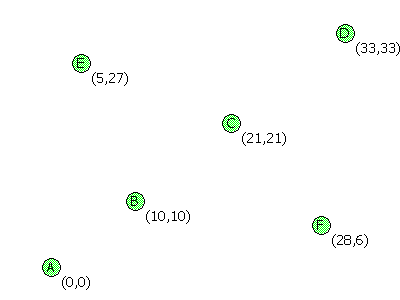

In [4]:
Image(filename='points.gif')

using the complete-link proximity measure (the distance between two clusters is the largest distance between any two points, one from each cluster).

In [88]:
from first import first

labels_to_points = {'A': ( 0,  0),
                    'B': (10, 10),
                    'C': (21, 21),
                    'D': (33, 33),
                    'E': ( 5, 27),
                    'F': (28,  6)}

points_to_labels = {v: k for k, v in labels_to_points.items()}

clusters = [[labels_to_points[letter]] for letter in labels_to_points.keys()]

def point_distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))

def cluster_distance(cluster1, cluster2):
    max_dist = None
    for p1 in cluster1:
        for p2 in cluster2:
            dist = point_distance(p1, p2)
            if max_dist is None or dist > max_dist:
                max_dist = dist
    return max_dist

def closest_clusters(clusters):
    min_dist = None
    closest = None, None
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            cluster1 = clusters[i]
            cluster2 = clusters[j]
            dist = cluster_distance(cluster1, cluster2)
            if min_dist is None or dist < min_dist:
                min_dist = dist
                closest = cluster1, cluster2
    return closest
            
def merge_clusters(clusters, clusters_to_merge):
    merged_cluster = [p for cm in clusters_to_merge for p in cm]
    return [c for c in clusters if c not in clusters_to_merge] + [merged_cluster]
            

TARGET_NUM_CLUSTERS = 1

while len(clusters) > TARGET_NUM_CLUSTERS:
    cluster1, cluster2 = closest_clusters(clusters)
    clusters_to_merge = [cluster1, cluster2]
    clusters = merge_clusters(clusters, clusters_to_merge)
    labels = [[points_to_labels[point] for point in cluster] for cluster in clusters]
    print('Clusters: {}'.format(labels))

Clusters: [['C'], ['D'], ['E'], ['F'], ['A', 'B']]
Clusters: [['D'], ['E'], ['A', 'B'], ['C', 'F']]
Clusters: [['E'], ['A', 'B'], ['D', 'C', 'F']]
Clusters: [['D', 'C', 'F'], ['E', 'A', 'B']]
Clusters: [['D', 'C', 'F', 'E', 'A', 'B']]
